# Graphs for Step 2.1 - Index Diagrams

First of all, let us import some useful packages.

In [1]:
import numpy as np
import matplotlib.ticker
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import os
from scipy import interpolate
from scipy.special import erf
import matplotlib.ticker as ticker

Now, let us open the indices data.

In [2]:
### Opening the data. All the data will come to the dataframe as strings! Be careful!
df = pd.read_csv("FinalOpticalMeasurements.txt", delim_whitespace=True, header=None, engine="python")

### Defining the first row as the columns names.
df.columns = df.iloc[0]

### Dropping the first row (this has been transfered to columns names) and reseting the index.
df = df.drop(0, axis=0)
df = df.reset_index(drop=True)

### Setting the first column as ID.
#df = df.set_index("SSPs")

df

,SSPs,Mgb,e_Mgb,Fe5270,e_Fe5270,Fe5335,e_Fe5335
0,m22ssp005.spec,0.00,0.00,0.00,0.00,0.00,0.00
1,m22ssp010.spec,0.00,0.00,0.00,0.00,0.00,0.00
2,m22ssp015.spec,0.00,0.00,0.00,0.00,0.00,0.00
3,m22ssp020.spec,0.00,0.00,0.00,0.00,0.00,0.00
4,m22ssp025.spec,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...
259,m72ssp200.spec,4.80,0.42,4.13,0.34,4.11,0.14
260,m72ssp205.spec,4.84,0.44,4.16,0.31,4.10,0.19
261,m72ssp210.spec,4.89,0.39,4.11,0.34,4.13,0.16
262,m72ssp215.spec,4.81,0.41,4.17,0.31,4.10,0.16


Now, let us insert a column with the ages of the SSPs.

In [3]:
### Defining a list of the ssp files names.
ssp_list = df["SSPs"] #Collection of strings.

### Defining a array, and then defining a pd.Series for saving the ages.
age=np.zeros(len(ssp_list))
age=pd.Series(age)

### Obtaining the ages.
i=0
for ssp in ssp_list:
    ssp_df = pd.read_csv(ssp, delim_whitespace=True, header=None, engine="python")
    age.iloc[i] = ssp_df.iloc[4,3]
    i+=1
    
### Adding the age to the original dataframe.
df['Age'] = pd.Series(age).astype(float)

df

,SSPs,Mgb,e_Mgb,Fe5270,e_Fe5270,Fe5335,e_Fe5335,Age
0,m22ssp005.spec,0.00,0.00,0.00,0.00,0.00,0.00,1.778000e+05
1,m22ssp010.spec,0.00,0.00,0.00,0.00,0.00,0.00,3.162000e+05
2,m22ssp015.spec,0.00,0.00,0.00,0.00,0.00,0.00,5.623000e+05
3,m22ssp020.spec,0.00,0.00,0.00,0.00,0.00,0.00,1.000000e+06
4,m22ssp025.spec,0.00,0.00,0.00,0.00,0.00,0.00,1.259000e+06
...,...,...,...,...,...,...,...,...
259,m72ssp200.spec,4.80,0.42,4.13,0.34,4.11,0.14,1.475000e+10
260,m72ssp205.spec,4.84,0.44,4.16,0.31,4.10,0.19,1.600000e+10
261,m72ssp210.spec,4.89,0.39,4.11,0.34,4.13,0.16,1.725000e+10
262,m72ssp215.spec,4.81,0.41,4.17,0.31,4.10,0.16,1.850000e+10


Now, let us insert the metallicities, according to http://www.bruzual.org/bc03/doc/bc03.pdf.

In [4]:
number_files_per_model = 44

### m22
df.loc[(0*number_files_per_model):(1*number_files_per_model-1), '[Fe/H]'] = -2.2490
### m32
df.loc[(1*number_files_per_model):(2*number_files_per_model-1), '[Fe/H]'] = -1.6464
### m42
df.loc[(2*number_files_per_model):(3*number_files_per_model-1), '[Fe/H]'] = -0.6392
### m52
df.loc[(3*number_files_per_model):(4*number_files_per_model-1), '[Fe/H]'] = -0.3300
### m62
df.loc[(4*number_files_per_model):(5*number_files_per_model-1), '[Fe/H]'] = 0.0932
### m72
df.loc[(5*number_files_per_model):(6*number_files_per_model-1), '[Fe/H]'] = 0.5595

df

,SSPs,Mgb,e_Mgb,Fe5270,e_Fe5270,Fe5335,e_Fe5335,Age,[Fe/H]
0,m22ssp005.spec,0.00,0.00,0.00,0.00,0.00,0.00,1.778000e+05,-2.2490
1,m22ssp010.spec,0.00,0.00,0.00,0.00,0.00,0.00,3.162000e+05,-2.2490
2,m22ssp015.spec,0.00,0.00,0.00,0.00,0.00,0.00,5.623000e+05,-2.2490
3,m22ssp020.spec,0.00,0.00,0.00,0.00,0.00,0.00,1.000000e+06,-2.2490
4,m22ssp025.spec,0.00,0.00,0.00,0.00,0.00,0.00,1.259000e+06,-2.2490
...,...,...,...,...,...,...,...,...,...
259,m72ssp200.spec,4.80,0.42,4.13,0.34,4.11,0.14,1.475000e+10,0.5595
260,m72ssp205.spec,4.84,0.44,4.16,0.31,4.10,0.19,1.600000e+10,0.5595
261,m72ssp210.spec,4.89,0.39,4.11,0.34,4.13,0.16,1.725000e+10,0.5595
262,m72ssp215.spec,4.81,0.41,4.17,0.31,4.10,0.16,1.850000e+10,0.5595


Converting things to float.

In [5]:
### Converting things to float.
df.loc[:, 'Mgb':'[Fe/H]'] = df.loc[:, 'Mgb':'[Fe/H]'].astype(float)

Now, let us compute and save the \<Fe\> index, the mean of Fe5270 and Fe5335.

In [6]:
df['<Fe>'] = (df['Fe5270'] + df['Fe5335'])/2

df['e_<Fe>'] = np.sqrt((df['e_Fe5270']**2 + df['e_Fe5335']**2))/2

df

,SSPs,Mgb,e_Mgb,Fe5270,e_Fe5270,Fe5335,e_Fe5335,Age,[Fe/H],<Fe>,e_<Fe>
0,m22ssp005.spec,0.00,0.00,0.00,0.00,0.00,0.00,1.778000e+05,-2.2490,0.000,0.000000
1,m22ssp010.spec,0.00,0.00,0.00,0.00,0.00,0.00,3.162000e+05,-2.2490,0.000,0.000000
2,m22ssp015.spec,0.00,0.00,0.00,0.00,0.00,0.00,5.623000e+05,-2.2490,0.000,0.000000
3,m22ssp020.spec,0.00,0.00,0.00,0.00,0.00,0.00,1.000000e+06,-2.2490,0.000,0.000000
4,m22ssp025.spec,0.00,0.00,0.00,0.00,0.00,0.00,1.259000e+06,-2.2490,0.000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
259,m72ssp200.spec,4.80,0.42,4.13,0.34,4.11,0.14,1.475000e+10,0.5595,4.120,0.183848
260,m72ssp205.spec,4.84,0.44,4.16,0.31,4.10,0.19,1.600000e+10,0.5595,4.130,0.181797
261,m72ssp210.spec,4.89,0.39,4.11,0.34,4.13,0.16,1.725000e+10,0.5595,4.120,0.187883
262,m72ssp215.spec,4.81,0.41,4.17,0.31,4.10,0.16,1.850000e+10,0.5595,4.135,0.174428


### Plotting the graphs

First, let us write some definitions.

In [7]:
###############################################################################
########################### SOME DEFINITIONS BEFORE PLOTS ######################

### Grouping by metallicities:
groups = df.groupby('[Fe/H]')     #Grouping the elements.
groups_list = list(groups.groups)                 #Listing the groups indices.

### Grouping by ages:
groups2 = df.groupby('Age')       #Grouping the elements.
groups2_list = list(groups2.groups)               #Listing the groups indices.

### Defining colors:
colors = ['#eb0202','#ebbc02', '#54eb02', '#02ebcc', '#0602eb', '#eb02e7']
colors2 = ['#609E54', '#EC95AC','#FF00F0', '#737373', '#048700', '#eb0202', '#eb7302', '#54eb02', '#02ebcc',  
           '#ebbc02', '#02a1eb', '#0602eb','#5b02eb', '#eb02e7', '#000000', '#aba563', '#de9a80']

In [8]:
groups2_list

[177800.0,
 316200.0,
 562300.0,
 1000000.0,
 1259000.0,
 1585000.0,
 1995000.0,
 2512000.0,
 3162000.0,
 3981000.0,
 5012000.0,
 6310000.0,
 7943000.0,
 10000000.0,
 12590000.0,
 15850000.0,
 19950000.0,
 25120000.0,
 31000000.0,
 36000000.0,
 42500000.0,
 55000000.0,
 90480000.0,
 160900000.0,
 286100000.0,
 508800000.0,
 904800000.0,
 1609000000.0,
 2000000000.0,
 2500000000.0,
 3500000000.0,
 4750000000.0,
 6000000000.0,
 7250000000.0,
 8500000000.0,
 9750000000.0,
 11000000000.0,
 12250000000.0,
 13500000000.0,
 14750000000.0,
 16000000000.0,
 17250000000.0,
 18500000000.0,
 19750000000.0]

Now, let us make the index-index diagram with age-metallicity grid.

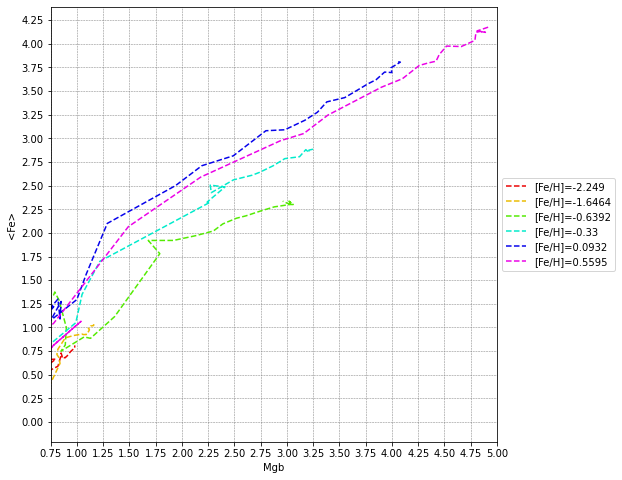

In [9]:
### Defining a list containing the ages that will be plotted.
groups2_list_limited = [i for i in groups2_list if (i>=177800.0) & (i <= 19750000000.0)]

#groups2_list_limited = [286100000.0, 508800000.0, 904800000.0, 1609000000.0, 2000000000.0, 
#                        2500000000.0, 3500000000.0, 4750000000.0, 6000000000.0, 7250000000.0, 8500000000.0,
#                        11000000000.0, 13500000000.0]

### Defining an age limit for plotting, based on the previous list.
age_lim_min = min(groups2_list_limited)
age_lim_max = max(groups2_list_limited)

### Making the plot.
fig = plt.figure(figsize=(8, 8))   #Defining figure. 
ax = plt.subplot()                 #Defining ax.

### Plotting the lines of constant metallicity.
j=0
for i in groups_list:
    grouping = groups.get_group(i)[(groups.get_group(i)['Age']>=age_lim_min) & (groups.get_group(i)['Age']<=age_lim_max)]
    x = grouping['Mgb']
    y = grouping['<Fe>']
    ax.plot(x, y, color=colors[j], linestyle='dashed', label='[Fe/H]='+str(i))
    j+=1

### Plotting the lines of constant age.
#j=0
#for i in groups2_list_limited:
#    grouping2 = groups2.get_group(i)
#    x = grouping2['Mgb']
#    y = grouping2['<Fe>']
#    ax.plot(x, y, color=colors2[j], linestyle='dashdot', label='Age (Gyr)='+str(i/(1e9)))
#    j+=1

### Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Setting the axis limits.
ax.set_xlim(left=0.75, right=5)
#ax.set_ylim(bottom=1.5, top=7)

### Setting the axis labels.
ax.set_xlabel('Mgb')
ax.set_ylabel('<Fe>')

### Putting a grid in the graph.
ax.grid(color = 'gray', linestyle = '--', linewidth = 0.5)

ax.xaxis.set_major_locator(plt.MultipleLocator(0.25)) #Adding more lines to the grid.
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.5))

ax.yaxis.set_major_locator(plt.MultipleLocator(0.25)) #Adding more lines to the grid.
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.5))

plt.show()

Now, let us make the age-index graph.

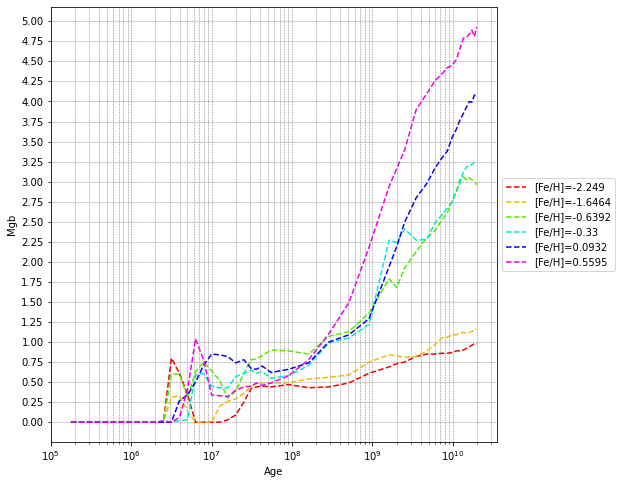

In [10]:
### Defining a list containing the ages that will be plotted.
#groups2_list_limited = [i for i in groups2_list if (i>=160900000.0) & (i < 119750000000.0)]

groups2_list_limited = groups2_list #All ages.

### Defining an age limit for plotting.
age_lim_min = min(groups2_list_limited)
age_lim_max = max(groups2_list_limited)

### Making the plot.
fig = plt.figure(figsize=(8, 8))   #Defining figure. 
ax = plt.subplot()                 #Defining ax.

### Plotting the age vs index.
j=0
for i in groups_list:
    grouping = groups.get_group(i)[(groups.get_group(i)['Age']>=age_lim_min) & (groups.get_group(i)['Age']<=age_lim_max)]
    x = grouping['Age']
    y = grouping['Mgb']
    ax.plot(x, y, color=colors[j], linestyle='dashed', label='[Fe/H]='+str(i))
    j+=1

### Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Setting the axis limits.
#ax.set_xlim(left=0.3, right=3.5)
#ax.set_ylim(bottom=1.5, top=7)

### Setting the axis labels.
ax.set_xlabel('Age')
ax.set_ylabel('Mgb')

### Setting the axis scale.
ax.set_xscale('log')

### Putting a grid in the graph.
ax.grid(color = 'gray', linestyle = '--', linewidth = 0.5, which="both")

#ax.xaxis.set_major_locator(plt.MultipleLocator(0.25))
#ax.xaxis.set_minor_locator(plt.MultipleLocator(0.5))

ax.yaxis.set_major_locator(plt.MultipleLocator(0.25))  #Adding more lines to the grid.
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.5))   

plt.show()